# Revenue Analysis of Megaline's Surf and Ultimate Plans: A Data-Driven Approach to Optimizing Advertising Strategy

Megaline offers two prepaid plans, Surf and Ultimate.  This project will determine which plan generates more revenue to help the commercial department adjust their advertising budget.  These conclusions are tentative as they reflect the data of a small data set: however, they are a starting point in determining which plan generates more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from math import factorial
from scipy import stats as st

## Loading data

This project draws on 5 data sets: call data, internet usage, message data, plan information, and user information.

In [2]:
# Load the data files into different DataFrames
try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')
except FileNotFoundError:
    print('File was not found.')

## Preparing the data

Having loaded the data, general information can be printed, fixed, and the data can be enriched as needed for each data frame.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


This is a small data frame containing 2 entries with no null values.  Data appears to be fairly standard and clean.  I will maintain usd_per_message and usd_per_minute as float64 data type to avoid loss of data.

## Fixing and Enriching Data

There is no need to fix the data, and no additional factors are necessary.

## Users

In [5]:
# Print the general/summary information about the users' DataFrame

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users

users.sample(5, random_state=500)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
57,1057,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,ultimate,NaN
70,1070,Jacelyn,Contreras,66,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-05-12,surf,NaN
364,1364,Clarine,Bonner,75,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-08-09,surf,NaN
108,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaN
318,1318,Huey,Walsh,54,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-09-29,surf,NaN


The data set contains information for 500 users, including 34 former users (as evidenced by the 34 non-null values in churn_date).  All data are accounted for and need only one minor adjustments: user_id would be better represented in object data type as the numbers have no mathematical significance.

### Fixing the Data

In [7]:
users['user_id'] = users['user_id'].astype(object)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    object
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


### Enriching the Data

No additional factors are necessary.

## Calls

In [8]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
# Print a sample of data for calls
calls.sample(15, random_state=137735)

,id,user_id,call_date,duration
108291,1382_1547,1382,2018-10-09,0.00
72205,1256_673,1256,2018-09-24,18.51
23554,1087_10,1087,2018-12-02,11.07
15780,1062_20,1062,2018-08-08,18.01
46937,1170_1095,1170,2018-10-23,16.80
19416,1073_262,1073,2018-04-28,14.78
42756,1156_361,1156,2018-06-23,13.69
55578,1199_182,1199,2018-08-21,0.00
29479,1111_116,1111,2018-09-21,4.49
79875,1286_6,1286,2018-12-30,0.17


The data set is complete with no null values.  User_id will be converted to the object data type for the same reason noted above.  Call date will be converted to a date-time object for greater analysis options.  I will add a secondary column for duration that uses an integer data type as Megaline rounds call length up to the next full minute for billing purposes, so partial duration is most likely unneccessary.  However, it is prudent to maintain the data and simply create a second column: 'billed_duration'.  I will also group by user_id.<br><br>
It is unclear why some calls are marked as being 0.00 minutes long... is this missing data?  Calls that were immediately cancelled?  It is impossible to draw a conclusion at this point.

### Fixing the data

In [10]:
calls['user_id'] = calls['user_id'].astype(object)
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()
calls.sample(15, random_state=137735)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
108291,1382_1547,1382,2018-10-09,0.00
72205,1256_673,1256,2018-09-24,18.51
23554,1087_10,1087,2018-12-02,11.07
15780,1062_20,1062,2018-08-08,18.01
46937,1170_1095,1170,2018-10-23,16.80
19416,1073_262,1073,2018-04-28,14.78
42756,1156_361,1156,2018-06-23,13.69
55578,1199_182,1199,2018-08-21,0.00
29479,1111_116,1111,2018-09-21,4.49
79875,1286_6,1286,2018-12-30,0.17


In [11]:
calls.groupby('user_id')
calls.head(15)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Data types have been converted and no data has been compromised based on referencing the sample.  Additionally, I grouped by user_id and printed the head to ensure everything worked as intended.

### Enriching data

In [12]:
calls['billed_duration'] = calls['duration'].apply(lambda x: math.ceil(x))

calls.head()

,id,user_id,call_date,duration,billed_duration
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


This should provide more flexibility for analysis as Megaline rounds calls to the next full minute for billing purposes.

## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Print a sample of data for messages

messages.sample(10, random_state=21)

,id,user_id,message_date
65138,1417_8,1417,2018-12-12
29945,1187_53,1187,2018-10-05
72660,1470_288,1470,2018-10-02
22910,1137_326,1137,2018-10-25
66048,1432_15,1432,2018-11-23
69870,1454_232,1454,2018-10-13
46614,1316_547,1316,2018-09-26
41867,1268_240,1268,2018-05-29
56525,1357_155,1357,2018-09-12
30638,1193_286,1193,2018-12-08


This data frame contains information about id and message date.  I will convert user_id to an object data type and message_date to date-time format for consistency across data frames.  I will also group by user_id.

### Fixing the data

In [15]:
messages['user_id'] = messages['user_id'].astype(object)
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


Data types converted for consistency and greater possibilities for analysis.

### Enriching data

In [16]:
messages.groupby('user_id')
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Data grouped by user id.

## Internet

In [17]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Print a sample of data for the internet traffic
internet.sample(10, random_state=104825)


,id,user_id,session_date,mb_used
32670,1147_300,1147,2018-12-17,264.46
99832,1472_274,1472,2018-07-18,0.00
81961,1384_177,1384,2018-06-19,486.19
52443,1236_302,1236,2018-04-15,404.29
104409,1498_483,1498,2018-10-21,86.65
22582,1103_127,1103,2018-09-05,400.30
59414,1268_83,1268,2018-08-02,781.24
91217,1420_110,1420,2018-10-20,0.00
71444,1334_12,1334,2018-12-18,248.84
37558,1170_388,1170,2018-12-06,625.79


User_id should be converted to object data type and session_date should be converted to datetime.

### Fixing the Data

In [19]:
internet['user_id'] = internet['user_id'].astype(object)
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


Changed data types accordingly.

### Enriching the Data

No enrichment is needed.

## Study plan conditions

In [20]:
# Print out the plan conditions

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The Surf plan includes 500 minutes, 50 messages, and 15360 mb/month of data for 20/month.  If Surf users exceed those limits, they pay 0.03/minute, 0.03/message, and 10/gb.  <br><br>The Ultimate plan includes 3000 minutes, 1000 messages, and 30720 mb/month of data for 70/month.  If Ultimate users exceed those limits, they pay 0.01/minute, 0.01/message, and 7/gb.

## Aggregating Data per User

Now that the data is clean, I will aggregate the data by user and per period to simplify further analysis.

In [21]:
# Calculating the number of calls made by each user per month and saving the result.
calls['month'] = calls['call_date'].dt.month
calls_upm = calls.groupby(['user_id', 'month']).agg(total_calls=('id', 'count')).reset_index()
calls_upm

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [22]:
# Calculating the amount of minutes spent by each user per month and saving the result.
calls_mpu = calls.groupby(['user_id','month']).agg({'billed_duration' : ('sum')}).reset_index()
calls_mpu

,user_id,month,billed_duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [23]:
# Calculating the number of messages sent by each user per month and saving the result.
messages['month'] = messages['message_date'].dt.month
msg_upm = messages.groupby(['user_id', 'month']).agg(total_msgs=('id', 'count')).reset_index()
msg_upm

,user_id,month,total_msgs
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [24]:
# Calculating the volume of internet traffic used by each user per month and saving the result.
internet['month'] = internet['session_date'].dt.month

def round_to_gb(mb):
    return np.ceil(mb/1024)
internet['gb_billed'] = internet['mb_used'].apply(round_to_gb)
internet_upm = internet.groupby(['user_id', 'month']).agg({'gb_billed':('sum')}).reset_index()
internet_upm

,user_id,month,gb_billed
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0
...,...,...,...
2272,1498,12,56.0
2273,1499,9,37.0
2274,1499,10,52.0
2275,1499,11,43.0


Now that I have calculated totals per month, I will merge all of these dataframes into one for further analysis.

In [25]:
# Merging the data for calls, minutes, messages, internet based on user_id and month
usage = calls_upm.merge(calls_mpu, how='outer', on=['user_id', 'month'])
usage = usage.merge(msg_upm, how='outer', on=['user_id', 'month'])
usage = usage.merge(internet_upm, how='outer', on=['user_id', 'month'])
usage

,user_id,month,total_calls,billed_duration,total_msgs,gb_billed
0,1000,12,16.0,124.0,11.0,4.0
1,1001,8,27.0,182.0,30.0,21.0
2,1001,9,49.0,315.0,44.0,41.0
3,1001,10,65.0,393.0,53.0,50.0
4,1001,11,64.0,426.0,36.0,49.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,27.0
2289,1361,5,NaN,NaN,2.0,7.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,2.0


In [50]:
# Adding the plan information
usage = usage.merge(users[['user_id', 'plan']], how='outer', on='user_id')
usage = usage.fillna(0)
usage

,user_id,month,total_calls,billed_duration,total_msgs,gb_billed,plan_x,plan_y
0,1000.0,12.0,16.0,124.0,11.0,4.0,ultimate,ultimate
1,1001.0,8.0,27.0,182.0,30.0,21.0,surf,surf
2,1001.0,9.0,49.0,315.0,44.0,41.0,surf,surf
3,1001.0,10.0,65.0,393.0,53.0,50.0,surf,surf
4,1001.0,11.0,64.0,426.0,36.0,49.0,surf,surf
...,...,...,...,...,...,...,...,...
2298,1307.0,0.0,0.0,0.0,0.0,0.0,surf,surf
2299,1319.0,0.0,0.0,0.0,0.0,0.0,surf,surf
2300,1378.0,0.0,0.0,0.0,0.0,0.0,surf,surf
2301,1463.0,0.0,0.0,0.0,0.0,0.0,ultimate,ultimate


In [27]:
usage_plan_limits = usage.merge(plans, left_on='plan', right_on='plan_name', how='left')
usage_plan_limits

,user_id,month,total_calls,billed_duration,total_msgs,gb_billed,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000.0,12.0,16.0,124.0,11.0,4.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001.0,8.0,27.0,182.0,30.0,21.0,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001.0,9.0,49.0,315.0,44.0,41.0,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001.0,10.0,65.0,393.0,53.0,50.0,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001.0,11.0,64.0,426.0,36.0,49.0,surf,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307.0,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03,surf
2299,1319.0,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03,surf
2300,1378.0,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03,surf
2301,1463.0,NaN,NaN,NaN,NaN,NaN,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate


Now that there is a merged table with usage and plan information for all of the users in the sample, monthly revenue can be calculated.

In [28]:
# Calculating the monthly revenue for each user
def monthly_rev(row, plans):
    
    revenue = 0
    
    plan = row['plan']
    total_mins = row['billed_duration']
    total_msgs = row['total_msgs']
    total_internet = row['gb_billed']
    
    plan_data = plans[plans['plan_name'] == plan].iloc[0]
    
    calls_diff = max(0, total_mins - plan_data['minutes_included'])
    msgs_diff = max(0, total_msgs - plan_data['messages_included'])
    internet_diff = max(0, total_internet - (plan_data['mb_per_month_included']/1024))
    
    revenue += calls_diff * plan_data['usd_per_minute']
    revenue += msgs_diff * plan_data['usd_per_message']
    revenue += internet_diff * plan_data['usd_per_gb']
    revenue += plan_data['usd_monthly_pay']
    
    return revenue

usage_plan_limits['monthly_revenue'] = usage_plan_limits.apply(monthly_rev, axis=1, args=(plans,)).round(2)
usage_plan_limits

,user_id,month,total_calls,billed_duration,total_msgs,gb_billed,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1000.0,12.0,16.0,124.0,11.0,4.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
1,1001.0,8.0,27.0,182.0,30.0,21.0,surf,50,15360,500,20,10,0.03,0.03,surf,80.00
2,1001.0,9.0,49.0,315.0,44.0,41.0,surf,50,15360,500,20,10,0.03,0.03,surf,280.00
3,1001.0,10.0,65.0,393.0,53.0,50.0,surf,50,15360,500,20,10,0.03,0.03,surf,370.09
4,1001.0,11.0,64.0,426.0,36.0,49.0,surf,50,15360,500,20,10,0.03,0.03,surf,360.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307.0,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03,surf,20.00
2299,1319.0,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03,surf,20.00
2300,1378.0,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03,surf,20.00
2301,1463.0,NaN,NaN,NaN,NaN,NaN,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00


We now have calculations for the total revenue earned per month from each customer.

## Studying User Behaviour

### Calls

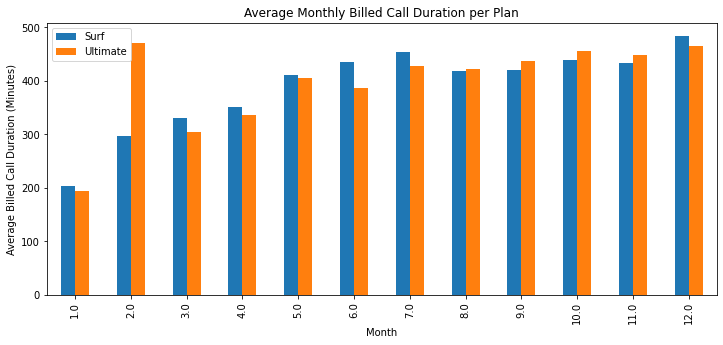

In [29]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
calls_dur_mandp = usage.groupby(['plan', 'month'])['billed_duration'].mean('billed_duration').reset_index()
calls_dur_mandp_pivot = calls_dur_mandp.pivot(index='month', columns='plan', values='billed_duration')
calls_dur_mandp_pivot.plot(kind='bar',
                     title='Average Monthly Billed Call Duration per Plan', 
                     xlabel='Month', 
                     ylabel='Average Billed Call Duration (Minutes)', figsize=[12, 5])
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [30]:
calls_dur_mandp_pivot

plan,surf,ultimate
month,,
1.0,203.000000,193.500000
2.0,297.000000,470.333333
3.0,330.000000,304.250000
4.0,351.540000,336.857143
5.0,410.240000,406.241379
6.0,435.791667,387.444444
7.0,453.733333,427.067797
8.0,417.849057,421.436620
9.0,420.732984,437.511628


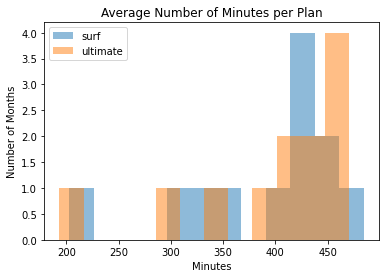

In [31]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
calls_dur_mandp_pivot['surf'].plot(kind='hist', 
                                   bins=12, 
                                   title='Average Number of Minutes per Plan', 
                                   alpha=0.5)
calls_dur_mandp_pivot['ultimate'].plot(kind='hist', 
                                       bins=12, 
                                       alpha=0.5)
plt.xlabel('Minutes')
plt.ylabel('Number of Months')
plt.legend()
plt.show()

In [32]:
# Calculate the mean and the variance of the monthly call duration
surf_calls_dur_avg = calls_dur_mandp_pivot['surf'].mean()
ultm_calls_dur_avg = calls_dur_mandp_pivot['ultimate'].mean()
surf_calls_dur_var = np.var(calls_dur_mandp_pivot['surf'])
ultm_calls_dur_var = np.var(calls_dur_mandp_pivot['ultimate'])
print(f'The mean for Surf plans is {surf_calls_dur_avg}.')
print(f'The mean for Ultimate plans is {ultm_calls_dur_avg}.')
print(f'The variance for Surf plans is {surf_calls_dur_var}.')
print(f'The variance for Ultimate plans is {ultm_calls_dur_var}.')


The mean for Surf plans is 389.6562177301583.
The mean for Ultimate plans is 396.13856827549125.
The variance for Surf plans is 5843.400883711428.
The variance for Ultimate plans is 6085.24696027484.


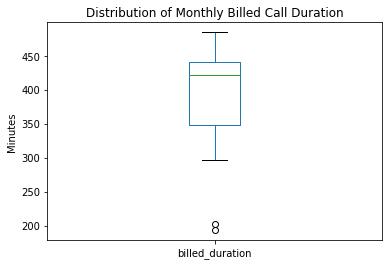

In [33]:
# Plot a boxplot to visualize the distribution of the monthly call duration
calls_dur_mandp['billed_duration'].plot(kind='box')
plt.title('Distribution of Monthly Billed Call Duration')
plt.ylabel('Minutes')
plt.show()

Overall, users of both plans have similar call activity.  Ultimate plan users' call duration varies more greatly than Surf plan users; this makes sense, given Ultimate plan users receive 3000 minutes as part of their plan.  However, users of both plans average around 385 minutes per month, which is within the limits of the lower-cost Surf plan.

### Messages

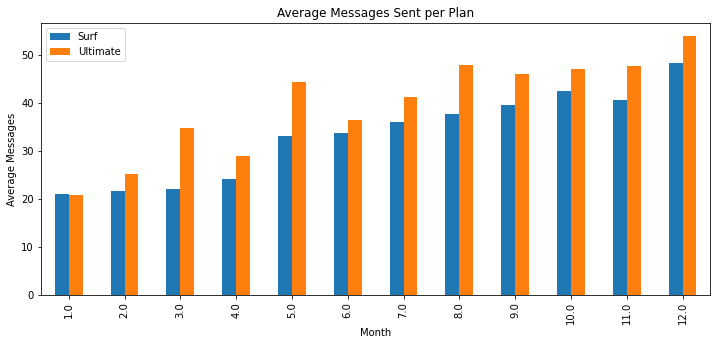

In [34]:
# Compare the number of messages users of each plan tend to send each month
msgs_sent_mandp = usage.groupby(['plan', 'month'])['total_msgs'].mean('total_msgs').reset_index()
msgs_sent_mandp_pivot = msgs_sent_mandp.pivot(index='month', columns='plan', values='total_msgs')
msgs_sent_mandp_pivot.plot(kind='bar', 
                           title='Average Messages Sent per Plan', 
                           xlabel='Month', 
                           ylabel='Average Messages', 
                           figsize=[12, 5])
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [35]:
msgs_sent_mandp_pivot


plan,surf,ultimate
month,,
1.0,21.000000,20.666667
2.0,21.600000,25.166667
3.0,21.937500,34.714286
4.0,24.166667,28.937500
5.0,33.017857,44.333333
6.0,33.616438,36.289474
7.0,35.945055,41.212766
8.0,37.596774,47.929825
9.0,39.523179,45.901408


In [36]:
#Calculating mean and variance for each plan
surf_msgs_sent_avg = msgs_sent_mandp_pivot['surf'].mean()
ultm_msgs_sent_avg = msgs_sent_mandp_pivot['ultimate'].mean()
surf_msgs_sent_var = np.var(msgs_sent_mandp_pivot['surf'])
ultm_msgs_sent_var = np.var(msgs_sent_mandp_pivot['ultimate'])
print(f'The mean for Surf plans is {surf_msgs_sent_avg}.')
print(f'The mean for Ultimate plans is {ultm_msgs_sent_avg}.')
print(f'The variance for Surf plans is {surf_msgs_sent_var}.')
print(f'The variance for Ultimate plans is {ultm_msgs_sent_avg}.')

The mean for Surf plans is 33.30976679539808.
The mean for Ultimate plans is 39.47232523405716.
The variance for Surf plans is 77.24233718034748.
The variance for Ultimate plans is 39.47232523405716.


On average, Ultimate plan users send only slightly more messages per month than Surf plan users, despite being allotted significantly more messages per month.  Although Surf plan users average fewer texts per month, the number of messages they send varies more dramatically from month to month, while Ultimate plan users are more consistent in their average number of messages sent.  This indicates that some Surf users are regularly incurring overage fees for sending text messages above their plan's limit of 50 messages per month.

### Internet

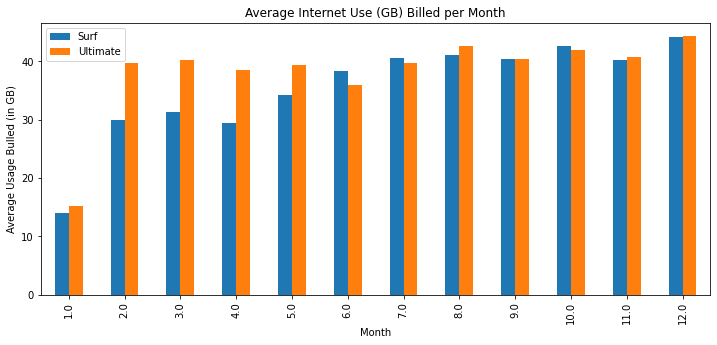

In [37]:
# Compare the amount of internet traffic consumed by users per plan
web_use_mandp = usage.groupby(['plan', 'month'])['gb_billed'].mean('gb_billed').reset_index()
web_use_mandp_pivot = web_use_mandp.pivot(index='month', columns='plan', values='gb_billed')
web_use_mandp_pivot.plot(kind='bar', 
                         title='Average Internet Use (GB) Billed per Month', 
                         xlabel='Month', 
                         ylabel='Average Usage Bulled (in GB)', 
                         figsize=[12,5])
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [38]:
web_use_mandp_pivot

plan,surf,ultimate
month,,
1.0,14.000000,15.250000
2.0,30.000000,39.714286
3.0,31.260870,40.250000
4.0,29.469388,38.428571
5.0,34.289474,39.310345
6.0,38.305263,35.851064
7.0,40.600000,39.644068
8.0,41.037736,42.619718
9.0,40.430052,40.465116


In [39]:
#Calculating mean and variance for each plan
surf_web_use_avg = web_use_mandp_pivot['surf'].mean()
ultm_web_use_avg = web_use_mandp_pivot['ultimate'].mean()
surf_web_use_var = np.var(web_use_mandp_pivot['surf'])
ultm_web_use_var = np.var(web_use_mandp_pivot['ultimate'])
print(f'The mean for Surf plans is {surf_web_use_avg}.')
print(f'The mean for Ultimate plans is {ultm_web_use_avg}.')
print(f'The variance for Surf plans is {surf_web_use_var}.')
print(f'The variance for Ultimate plans is {ultm_web_use_var}.')

The mean for Surf plans is 35.520728650738825.
The mean for Ultimate plans is 38.21627633720218.
The variance for Surf plans is 65.22963889892027.
The variance for Ultimate plans is 52.11680095099331.


On average, Ultimate plan users use more MB of internet than Surf users.  However, Ultimate plan users, in general, stay well within the limits of their plan's internet allotment (30,720mb).  Surf plan users use fewer MB of internet, but their average annual usage is within the limits of their plan (15,360mb).  However, for 7 out of 12 months, the average usage of Surf plan users exceeded that limit, generating additional revenue for Megaline.

## Revenue

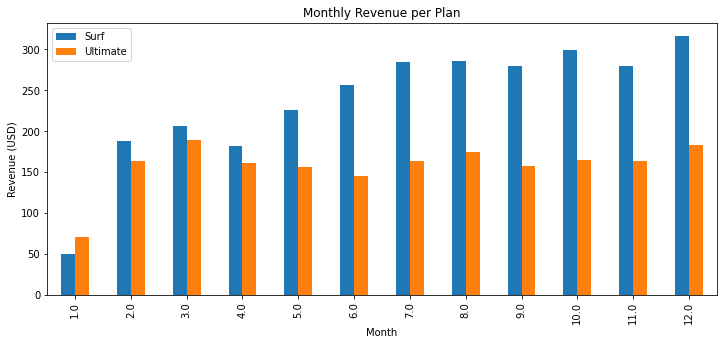

In [40]:
plan_revenue = usage_plan_limits.groupby(['plan', 'month'])['monthly_revenue'].mean('monthly_revenue').reset_index()
plan_revenue_pivot = plan_revenue.pivot(index='month', columns='plan', values='monthly_revenue')
plan_revenue_pivot.plot(kind='bar', 
                        title='Monthly Revenue per Plan', 
                        xlabel='Month', 
                        ylabel='Revenue (USD)', 
                        figsize=[12, 5])
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [41]:
plan_revenue_pivot['extra_rev_surf'] = plan_revenue_pivot['surf'] - 20
plan_revenue_pivot['extra_rev_ultm'] = plan_revenue_pivot['ultimate'] - 70
plan_revenue_pivot

plan,surf,ultimate,extra_rev_surf,extra_rev_ultm
month,,,,
1.0,50.000000,70.000000,30.000000,0.000000
2.0,187.730000,164.000000,167.730000,94.000000
3.0,206.810870,189.000000,186.810870,119.000000
4.0,181.910600,161.333333,161.910600,91.333333
5.0,225.810000,156.655172,205.810000,86.655172
6.0,256.389691,145.510638,236.389691,75.510638
7.0,285.236033,163.254237,265.236033,93.254237
8.0,285.474383,174.605634,265.474383,104.605634
9.0,280.281804,157.825581,260.281804,87.825581


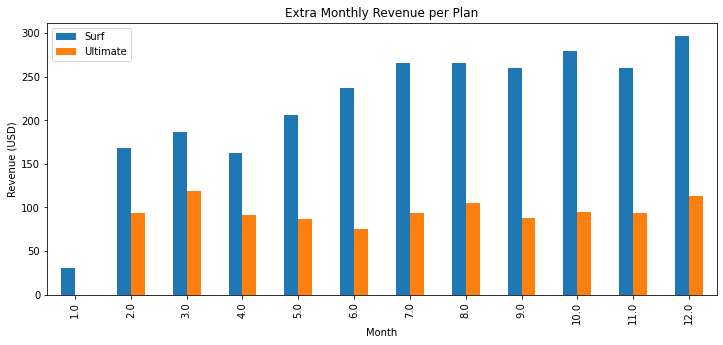

In [42]:
plan_revenue_pivot[['extra_rev_surf', 'extra_rev_ultm']].plot(kind='bar', 
                                              title='Extra Monthly Revenue per Plan', 
                                              xlabel='Month', 
                                              ylabel='Revenue (USD)', 
                                              figsize=[12, 5])
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [43]:
surf_plan_revenue_avg = plan_revenue_pivot['surf'].mean()
xtra_surf_rev_avg = plan_revenue_pivot['extra_rev_surf'].mean()
ultm_plan_revenue_avg = plan_revenue_pivot['ultimate'].mean()
xtra_ultm_rev_avg = plan_revenue_pivot['extra_rev_ultm'].mean()

surf_plan_revenue_var = np.var(plan_revenue_pivot['surf'])
xtra_surf_rev_var = np.var(plan_revenue_pivot['extra_rev_surf'])
ultm_plan_revenue_var = np.var(plan_revenue_pivot['ultimate'])
xtra_ultm_rev_var = np.var(plan_revenue_pivot['extra_rev_ultm'])

print(f'The mean for Surf plans is {surf_plan_revenue_avg}, and the mean for extra revenue is {xtra_surf_rev_avg}. The mean for Ultimate plans is {ultm_plan_revenue_avg}, and the mean for extra revenue is {xtra_ultm_rev_avg}.')
print(f'The variance for Surf plans is {surf_plan_revenue_var}, and the variance for extra revenue is {xtra_surf_rev_var}. The variance for Ultimate plans is {ultm_plan_revenue_var}, and the variance for extra revenue is {xtra_ultm_rev_var}.')


The mean for Surf plans is 237.91794578486943, and the mean for extra revenue is 217.91794578486943. The mean for Ultimate plans is 157.80476997201174, and the mean for extra revenue is 87.80476997201175.
The variance for Surf plans is 5033.503939961482, and the variance for extra revenue is 5033.503939961482. The variance for Ultimate plans is 826.9502301985362, and the variance for extra revenue is 826.9502301985361.


Overall, Surf plan users generate more revenue for the company: on average, 237.92 per month.  They frequently incur overage fees: the average amount of extra fees collected above their plan cost is 217.92 per month and the variance is high, suggesting that some customers incur many more fees while others incur far fewer.  On average, Ultimate plan users generate less revenue (157.80) and a smaller amount of extra fees (87.80) per month.  The variance is fairly low, so users typically stay close to the average.

## Testing Statistical Hypotheses

This project will determine which plan generates more revenue to help the commercial department adjust their advertising budget.  Does the average revenue of users of these calling plans differ?

The null hypothesis is that the plans generate the same or a very similar amount of revenue.  The alternative hypothesis is that one plan generates more revenue than the other plan.  Having already calculated average revenue, a ttest can be performed to compare the means of each group.  The alpha value will be 0.05 to ensure any differences are significant enough to justify recommending that the commercial department adjust their budget.

In [44]:
# Test the hypotheses
alpha = 0.05
results_all = st.ttest_ind(plan_revenue_pivot['surf'], plan_revenue_pivot['ultimate'])
print(f'p-value: {results_all.pvalue}')
if results_all.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')

p-value: 0.002170656138124336
We reject the null hypothesis.


Given revenue may vary between regions and advertisements may only need to be adjusted in specific areas, a test of the NY-NJ area--as a primarily urban area--in comparison to other regions may reveal if there are differences in regional usage that should be accounted for.

The null hypothesis is that NY-NJ users generate the same or a very similar amount of revenue to users in other parts of the country.  The alternative hypothesis is that NY-NJ users generate a significantly different amount of revenue.  Having already calculated average revenue, a ttest can be performed to compare the means of each group.  The alpha value will be 0.05 to ensure any differences are significant enough to justify recommending that the commercial department adjust their budget.

In [45]:
users_nynj = usage_plan_limits.merge(users[users['city'].str.contains('NY-NJ')], how='inner', on='user_id')
notnynj = ~users['city'].str.contains('NY-NJ')
users_other = usage_plan_limits.merge(users[notnynj], how='inner', on='user_id')
users_other

,user_id,month,total_calls,billed_duration,total_msgs,gb_billed,plan_x,messages_included,mb_per_month_included,minutes_included,...,usd_per_minute,plan_name,monthly_revenue,first_name,last_name,age,city,reg_date,plan_y,churn_date
0,1000.0,12.0,16.0,124.0,11.0,4.0,ultimate,1000,30720,3000,...,0.01,ultimate,70.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001.0,8.0,27.0,182.0,30.0,21.0,surf,50,15360,500,...,0.03,surf,80.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001.0,9.0,49.0,315.0,44.0,41.0,surf,50,15360,500,...,0.03,surf,280.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001.0,10.0,65.0,393.0,53.0,50.0,surf,50,15360,500,...,0.03,surf,370.09,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001.0,11.0,64.0,426.0,36.0,49.0,surf,50,15360,500,...,0.03,surf,360.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,1307.0,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,...,0.03,surf,20.00,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaN
1921,1319.0,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,...,0.03,surf,20.00,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaN
1922,1378.0,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,...,0.03,surf,20.00,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaN
1923,1463.0,NaN,NaN,NaN,NaN,NaN,ultimate,1000,30720,3000,...,0.01,ultimate,70.00,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaN


In [46]:
users_nynj_rev_avg = users_nynj['monthly_revenue'].mean()
users_other_rev_avg = users_other['monthly_revenue'].mean()
print(f'The average monthly revenue from customers in NY-NJ is {users_nynj_rev_avg}.')
print(f'The average monthly revenue from customers in other areas is {users_other_rev_avg}.')

The average monthly revenue from customers in NY-NJ is 265.059126984127.
The average monthly revenue from customers in other areas is 241.01393766233764.


In [47]:
# Test the hypotheses
alpha = 0.05
results_nynj = st.ttest_ind(users_nynj['monthly_revenue'], users_other['monthly_revenue'])
print(f'p-value: {results_nynj.pvalue}')
if results_all.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')


p-value: 0.005400964600740264
We reject the null hypothesis.


This preliminary inquiry indicates that there are regional differences that should be accounted for in determining the marketing budget.

## Conclusion
This project set out to determine whether the Surf or the Ultimate plan earned more revenue for Megaline so that the commercial budget could be adjusted.  As noted previously, these conclusions are a starting point in determining which plan generates more revenue.

This project relied on several Python libraries including pandas, numpy, pyplot, factorial, and stats to analyze data from five different datasets: call data, internet usage, message data, plan information, and user information. After loading and preprocessing the data, including handling data types, fixing inconsistencies, I aggregated the information to simplify further analysis.  There was no need to enrich the data to draw the conclusions needed for this project.

On average, users of both plans exhibited similar call activity, with Ultimate plan users showing more variation in call duration due to their higher plan limits. However, Ultimate plan users sent only slightly more messages per month despite having a significantly higher message allowance, while some Surf plan users regularly exceeded their message limit, incurring overage fees.  Additionally, I found that Ultimate plan users generally stayed well within their internet usage limit, while Surf plan users often exceeded their data allotment, resulting in additional revenue for the company.

In terms of revenue, Surf plan users generate more revenue on average due to the overage fees they regularly incur.  Therefore, the advertising department should focus commercials on the Surf plan as it generates the most revenue due to these overage fees.  As for regional differences, I compared the average revenue of users in the NY-NJ area to those in other regions. The results indicated significant regional variations, suggesting the need for further analysis to determine where adjustments in the marketing budget should be made to account for these differences.